<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_2023/p4-signal_detection_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Detection Theory (SDT): Tutorial (R version)

__Zhuanghua Shi__ (shi@lmu.de)

Last update: Jan. 16, 2024

## 1. Psychometric function (PF) and Signal Detection Theory (SDT)

A psychometric function (PF) maps how humans perform in psychophysical tasks, such as binary categorization, across various intensities of a physical stimulus (e.g., speed, duration, brightness). As the sensory input gradually increases from barely noticeable to clearly detectable, the likelihood of a certain response traces a sigmoid, or S-shaped curve. The general formula for a psychometric function incroporates both the chance of guessing and the attentional lapse:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ represents the threshold at which a stimulus is detected, $\beta$ indicates sensitivity to the stimulus, $\gamma$ denotes the level of chance response, and $\lambda$ is the lapse rate. The function $F(.)$ is typically a sigmoid function, such as the logistic function:

$$F(x,\alpha, \beta) = \frac{1}{1 + e^{-\beta(x-\alpha)}}$$ 

This sigmoid function captures the probability of a specific responses as the stimulus intensity varies, accounting for both the natural variability in human perception. 



## High-threshold theory

Imagine a simple two-interval force-choice (2IFC) task where observers identify which of two intervals contains a target. This type of 2IFC task can be thought of as a signal detection task. Let's denote the interval containing the stimulus as $S$ (signal), and the one without as $N$ (noise). The figure below (Kingdom & Prins, 2016) illustrates the probability distribution of two signals. 

![High Threshold](https://github.com/strongway/tutorial_data_science/raw/master/figures/high_threshold.png)
_Figure from Kingdom and Prins (2016), Figure 4.6_

The ability of a sensory system to detect a sitmulus in any given trial depends on the amount of sensory evidence accumulated. Suppose that the average accumulated evidence increases linearly as the stimulus intensity increases $x$:

$$\mu(x)=\pi + \rho x$$

Recall that the high-threshold theory assumes that the detection of a stimulus depends on surpasing a certain threshold -  the least stimulus energy necessary for detection. According to this theory, a stimulus exceeding this threshold gets detected, while one below it remained undetected. This threshold is high enough to make the probability of surpassing it at $x=0$ (i.e., noise) effectively nil.

Furthermore, the theory suggests that this threshold is not static but varies with factors such as the background noise, the observer's attention, and the characteristics of the stimulus itself. 

Given these asummptions, the function $F(x)$, representing the probability of a stimulus of intensity $x$ exceeding the threshold, is described by the cumulative normal distribution  (see the inset in the Figure).

In contrast to the high-threshold theory, SDT suggests the absence of a fixed internal threshold for stimulus detection. Instead, SDT posits that the sensory system generate a continuous signal based on the amount of sensory evidence that has been accumulated. The decision-making process assesses the sensory evidence for both Signal and Noise. A stimulus is regarded as a representation from the probability density function (PDF) associated with the stimulus. Similarly, in the absence of a stimulus, sensory evidence still varies, and the noise interval is regarded as a sample from the noise-asso=ociated PDF. Consequently, decisions are made based on comparing the relative amplitude of two samples: Signal, represented as $N(\pi + \rho x, \sigma^2$), and Noise, represented as $N(\pi, \sigma^2)$. 

In an unbiased 2AFC task, a simple decision rule is that if the sample taken during the sitmulus interval is greater than the sample taken during the noise interval. If the sample value from the signal exceeds that from the noise interval, the decisio is deemed positive. The variance in sensory evidence then follows a distribution of $N(\rho x, 2 \sigma^2)$. 

Reference:

Kingdom, F. A. A., & Prins, N. (2016). Psychophysics: A Practical Introduction. Academic Press. 

## 2. Calculation of d' and bias C for M-AFC

### 2.1 Yes/No 1AFC

The Yes/No paradigm, also referred to as 1AFC, is particularly prone to bias. Suppose two observers possessing identical internal sensitivities but applying different response criteria. The psychometric functions observed for these two would significantly diverge. The SDT can offer a way to differentiate between response biase and sensitivity with the following estimations:

$$d' = z(Hit) - z(FA)$$

$$c =-(z(Hit)+z(FA))/2$$

Here, $d'$ measures the sensitivity of the observer, and $c$ quantifies the response bias, revealing the tendency to respond 'yes' or 'no'.

### 2.2 Unbiased two-interval force-choice (2IFC)

In the conventional 2IFC procedure, the the N (noise) and S+N (signal plus noise) stimuli are presented in a trial as two options. The key decision-making rule here is to select the alternative in which the internal signal appear stronger. Under this rule, trials where the _difference_ in the internal signals between S+N and N is positive result in a correct decision. The variance of the _difference_ is the summation of the variances of the S+N and N. Hence, the accuracy rate in a 2IFC setup is represented by the grey area in the lower panel to the right of zero. This is:

$$ P_c = \Phi(d'/\sqrt{2})$$

and equivalently, 

$$ d' = z(P_c) \sqrt2$$

Here, $P_c$ represents the proportion of correct responses, $\Phi$ is the cumulative normal distribution function, and d' is the sensitivity index.

![2AFC](https://github.com/strongway/tutorial_data_science/raw/master/figures/2afc.jpg)
_Graphical illustration of how d' is calculated from an unbiased 2AFC task. Figure from Kingdom and Prins (2016)_


For the __biased 2IFC__, the calculation is the same as shown in 1AFC. 


## 3. Confusion Matrix and ROC curve

1AFC and 2AFC taks are essential binary classifications. The probabilities of outcomes from S and N define the confusion matrix. 

Response | Signal  |  Noise
-------- | -------  | -------
Yes      | Hit      | FA
No       | Miss     | CR

The Receiver Operating Characteristic (ROC) curve is plotted with the False Ararms (FA) on the horizontal axis and Hits on the vertical axis. On this curve, a liberal criterion results in high Hit and FA rates, appearing in the upper-right corner, while a convervative criterion with lower Hit and FA rates is located in the lower-left corner. A ROC curve with a higher d' value, comapred to a low one, displays __a larger area under the curve (AUC)__. 

When assuming a Gaussian distribution, the relationship between d' and AUX (denoted as $A_z$) is:

$$A_z = \Phi(\frac{d'}{\sqrt 2})$$
 



## 4. Example: Neural decoding (Britten et al. 1992)

[Britten and collegues (1992)](https://doi.org/10.1523/JNEUROSCI.12-12-04745.1992) explored how psychophysical observers and individual cortical neurons diffferentiate weak motion signals in a stochastic visual display. 

![RDM](https://github.com/strongway/tutorial_data_science/raw/master/figures/random_dot_motion.jpg)

They recorded money's behavioral responses as well as responses from MT neurons. The subsequent figure shows histograms of reponses from a single MT neuron at five different levels of motion coherence. Black bars illustrate responses to motion in the null direction, whereas white bars represent responses to motion in the neuron's preferred direction. It is evident that the distinction between the _signal_ and the _noise_ varies with the motion coherence.  

![MT Neurons responses](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_frequencies.jpg)

In a scenario where one observes a neuron's firing rate in a trial, how should one decode whether the RDM was moving upward or downward? It depends on the decision criterion! An unbias decision should set the criterion midway. 

The subsequent figure displays ROC curves for the five pairs. Each ROC was contructed by progressively adjusting the criterion level from 0 to 120 spikes in one-spike increments. the AUC, visible on the curves's right side, serves as an alternative metric for sensitivity. 

![ROC](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_rocs.jpg)


Moreoever, the last figure illustrates that the neuron's sensitivity curve closely aligns with the behavioral responses. This comparison underscores the neuron's role in motion detection and decision-making. 

![comparison](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_comparisons.jpg)



## 5. Practice session

The data used in this practice originated from the study:

Shi, Z., Allenmark, F., Zhu, X., Elliott, M. A., & Müller, H. J. (2019). To quit or not to quit in dynamic search. Attention, Perception & Psychophysics. https://doi.org/10.3758/s13414-019-01857-7

This study examines the search performance in static and dynamic displays. One striking finding from previous studies (e.g., Horowitz & Wolfe, 1998) on dynamic search is that the search slope, measured by search time per item, bears resemblance to that in static search. This study focuses on how the decision crtieria, particularly those related to the quiting process, influence search performance. 

During the upcoming practice, we aim to estimate the target detection sensitivity and decision criteria for both the static and dynamic search displays. 

The dataset for this practice is accessible at the following github repository:

https://github.com/msenselab/dynamic_search


### Step 1. Load data

Let us first load the first experimental data: 

In [2]:
library(tidyverse)

#load data
dat = read.csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv', sep = ',')
dat = dat %>% mutate(resp = 2-resp) # 1 - present, 2 - absent -> 1 and 0
head(dat)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



,target,setsize,dyn,resp,rt,sub,exp,correct
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
1,Absent,12,Static,0,2.5830068,1,1,1
2,Absent,8,Static,0,0.9359671,1,1,1
3,Present,16,Static,1,0.7947714,1,1,1
4,Present,8,Static,1,1.2418375,1,1,1
5,Absent,12,Static,0,1.7594853,1,1,1
6,Present,16,Static,1,2.1242149,1,1,1


Let's make a sanity check on the data, specifically verifying if the responses are limited to categorical values. 

In [3]:
print(unique(dat$resp))
# it seems there are some missing values in the data (3, which previous was -1)
# so we filter them out
dat = dat %>% filter(resp != 3)

[1] 0 1 3


#### 1.1 Mean reaction time analysis

Before diving into the signal detection analysis, let's first take a look the reaction times (RTs) for both static and dynamic search displays. Typically, in analyzing mean reaction times, we begain by removing outliers, then calculate the average. Commonly, the median absolute deviation (MAD) method is employed to identify and remove outliers. Specifically, data points that fall beyond 3 MADs from the median are excluded. It is important to apply this process individually for each subject.


In [4]:
# add 3 MAD and median for each subject
dat = dat %>% group_by(sub) %>% mutate(mad = mad(rt, constant = 3), median = median(rt)) %>% ungroup()
head(dat)


target,setsize,dyn,resp,rt,sub,exp,correct,mad,median
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
Absent,12,Static,0,2.5830068,1,1,1,1.976476,1.677143
Absent,8,Static,0,0.9359671,1,1,1,1.976476,1.677143
Present,16,Static,1,0.7947714,1,1,1,1.976476,1.677143
Present,8,Static,1,1.2418375,1,1,1,1.976476,1.677143
Absent,12,Static,0,1.7594853,1,1,1,1.976476,1.677143
Present,16,Static,1,2.1242149,1,1,1,1.976476,1.677143


In [5]:
# add a flag for outliers
dat = dat %>% mutate(outlier = ifelse(rt > median + mad | rt < 0.1, 1, 0))  # 0.1 is the minimum RT
head(dat)

target,setsize,dyn,resp,rt,sub,exp,correct,mad,median,outlier
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Absent,12,Static,0,2.5830068,1,1,1,1.976476,1.677143,0
Absent,8,Static,0,0.9359671,1,1,1,1.976476,1.677143,0
Present,16,Static,1,0.7947714,1,1,1,1.976476,1.677143,0
Present,8,Static,1,1.2418375,1,1,1,1.976476,1.677143,0
Absent,12,Static,0,1.7594853,1,1,1,1.976476,1.677143,0
Present,16,Static,1,2.1242149,1,1,1,1.976476,1.677143,0


In [6]:
dat %>% summarise(rate = mean(outlier))

rate
<dbl>
0.0789071


In [7]:
# now we remove outliers, average rt for each subject, target, dyn, and setsize
mrt = dat %>% filter(outlier == 0) %>% group_by(sub, target, dyn, setsize) %>% summarize(rt = mean(rt)) %>% ungroup()
head(mrt)

`summarise()` has grouped output by 'sub', 'target', 'dyn'. You can override
using the `.groups` argument.


sub,target,dyn,setsize,rt
<int>,<chr>,<chr>,<int>,<dbl>
1,Absent,Dynamic,8,2.344703
1,Absent,Dynamic,12,2.796481
1,Absent,Dynamic,16,2.699945
1,Absent,Static,8,1.622023
1,Absent,Static,12,2.053618
1,Absent,Static,16,2.266395


`summarise()` has grouped output by 'target', 'dyn'. You can override using the
`.groups` argument.


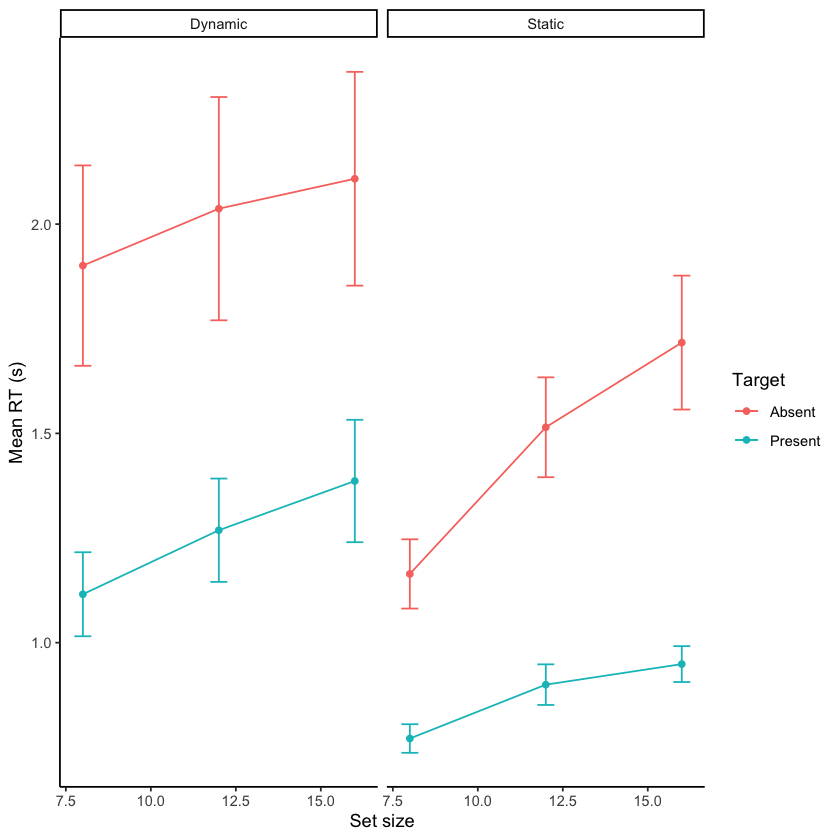

In [8]:
# we calculate the grand mean and standard error of rt for each target, dyn, and setsize, and visualize it
mmrt = mrt %>% group_by(target, dyn, setsize) %>% 
    summarize(grand_mean = mean(rt), grand_se = sd(rt)/sqrt(n())) %>% ungroup()
# visualize with ggplot
ggplot(mmrt, aes(x = setsize, y = grand_mean, color = target)) + 
    geom_point() + geom_line() + 
    geom_errorbar(aes(ymin = grand_mean - grand_se, 
                        ymax = grand_mean + grand_se), width = .5) + 
    facet_wrap( ~ dyn) + theme_classic() +
    labs(x = 'Set size', y = 'Mean RT (s)', color = 'Target')



An unusual observation is that the 'search slopes' in the dynamic displays were comparable for both target-present and target-absent conditions, a finding not predicted by conventional search models. In contrast, for the static search displays, the search slope in the target-absent condition was nearly double that of the target-present condition. This 'double' relationship can be attributed to the fact that, on average, only half as many items were examined in the target-present condition relative to the target-absent condition.

Next, we'll employ signal detection theory to investigate whether there are any differences in the decision criteria or sensitivity.

#### 1.2 Signal detection analysis

In [13]:
# let's quickly obtain the confusion matrix
confusion = dat %>% group_by(sub, dyn, setsize, target) %>%
        summarise(accuracy = mean(resp), n = n()) 
head(confusion)

`summarise()` has grouped output by 'sub', 'dyn', 'setsize'. You can override
using the `.groups` argument.


sub,dyn,setsize,target,accuracy,n
<int>,<chr>,<int>,<chr>,<dbl>,<int>
1,Dynamic,8,Absent,0.00000000,35
1,Dynamic,8,Present,0.97142857,35
1,Dynamic,12,Absent,0.02857143,35
1,Dynamic,12,Present,1.00000000,35
1,Dynamic,16,Absent,0.08571429,35
1,Dynamic,16,Present,0.91428571,35


> question: Can you convert the above column `accuracy`  into the conventional confusion matrix? 



### Step 2. Data transformation

From the above table, we discovered that under certain conditions, participants could perform the task flawlessly, which presented a challenge for calculating z-scores in these extreme cases. To address this, we adopted a well-established correction method ([Macmillan & Kaplan, 1985](https://www.ncbi.nlm.nih.gov/pubmed/4034817); Stanislaw & Todorov, 1999). Specifically, we adjusted the scores of $0$ to $0.5/n$, and scores $1$ to $1–0.5/n$, where $n$ represents the number of trials.


In [14]:
# replace 0 with 0.5/n and 1 with 1-0.5/n in the accuracy column
confusion = confusion %>% mutate(accuracy = ifelse(accuracy == 0, 0.5/n, accuracy)) %>% 
        mutate(accuracy = ifelse(accuracy == 1, 1-0.5/n, accuracy))
head(confusion)

sub,dyn,setsize,target,accuracy,n
<int>,<chr>,<int>,<chr>,<dbl>,<int>
1,Dynamic,8,Absent,0.01428571,35
1,Dynamic,8,Present,0.97142857,35
1,Dynamic,12,Absent,0.02857143,35
1,Dynamic,12,Present,0.98571429,35
1,Dynamic,16,Absent,0.08571429,35
1,Dynamic,16,Present,0.91428571,35


After adjusting the data, it's necessary to convert the table from 'long' format  to 'wide' format to create a confusion matrix. 
Note, in this example, the 'Target present' is considered the _signal_, while the 'Target Absent' is the _noise_. Therefore, the 'target' column is essential for this transformation (why?). This can be accomplished using the `pivot_wider()` function. 

In [15]:
# before we can use the pivot_wider function, we need to remove the n column
cWide = confusion %>% select(-n) %>% pivot_wider(names_from = target, values_from = accuracy)
head(cWide)

sub,dyn,setsize,Absent,Present
<int>,<chr>,<int>,<dbl>,<dbl>
1,Dynamic,8,0.01428571,0.9714286
1,Dynamic,12,0.02857143,0.9857143
1,Dynamic,16,0.08571429,0.9142857
1,Static,8,0.01428571,0.9857143
1,Static,12,0.01428571,0.9714286
1,Static,16,0.01428571,0.9714286


 At this stage, we possess half of the confusion matrix for each participant's condition. The columns labeled `Present` and `Absent` denote positive responses, corresponding to the rates of hits and false alarms, respectively. The remaining half of the matrix can be readily calculated: the miss rate is derived by subtracting the hit rate from 1, and the correct rejection rate is obtained by subtracting the false alarm rate from 1.


In [16]:
# lets rename the columns Absent and Present to FA and Hit
colnames(cWide) = c('sub', 'dyn', 'setsize', 'FA', 'Hit')
head(cWide)

sub,dyn,setsize,FA,Hit
<int>,<chr>,<int>,<dbl>,<dbl>
1,Dynamic,8,0.01428571,0.9714286
1,Dynamic,12,0.02857143,0.9857143
1,Dynamic,16,0.08571429,0.9142857
1,Static,8,0.01428571,0.9857143
1,Static,12,0.01428571,0.9714286
1,Static,16,0.01428571,0.9714286


### Step 3. Calculation of d' and C

$$d' = z(Hit) - z(FA)$$
$$C = - (z(Hit)+ z(FA))/2$$

In R, the z-score is computed using the `qnorm()` function. We calculate the d-prime ($d'$) and the criterion ($C$) for each participant, then integrate these values into the table as new columns using the `mutate()` function.

In [17]:
# now we calculate d' and C
cWide = cWide %>% mutate(dprime = qnorm(Hit) - qnorm(FA), C = -0.5*(qnorm(Hit) + qnorm(FA)))
head(cWide)

sub,dyn,setsize,FA,Hit,dprime,C
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dynamic,8,0.01428571,0.9714286,4.091566,1.435666e-01
1,Dynamic,12,0.02857143,0.9857143,4.091566,-1.435666e-01
1,Dynamic,16,0.08571429,0.9142857,2.735256,0.000000e+00
1,Static,8,0.01428571,0.9857143,4.378700,-6.661338e-16
1,Static,12,0.01428571,0.9714286,4.091566,1.435666e-01
1,Static,16,0.01428571,0.9714286,4.091566,1.435666e-01


### Step 4. Visualization

Let's first examine the average values. 



In [18]:
# let's average d' and C across subjects
mSDT = cWide %>% group_by(dyn, setsize) %>% 
    summarise(n = n(), md = mean(dprime), dse = sd(dprime)/sqrt(n), 
                    mc = mean(C), Cse = sd(C)/sqrt(n))
mSDT

`summarise()` has grouped output by 'dyn'. You can override using the `.groups`
argument.


dyn,setsize,n,md,dse,mc,Cse
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Dynamic,8,11,3.346979,0.2504379,-0.19270432,0.08699211
Dynamic,12,11,3.077152,0.2528495,-0.16451360,0.11438768
Dynamic,16,11,2.825317,0.3189047,-0.07609755,0.12407250
Static,8,11,4.077042,0.1193734,0.09862271,0.03928546
Static,12,11,4.006727,0.1337310,0.10441671,0.08270305
Static,16,11,3.766585,0.1695538,0.09397291,0.05021553


Observing the table above, it's evident that the dynamic display exhibited significantly lower detection sensitivity compared to the static display. Notably, the decline in sensitivity relative to the display set size was consistent across both types of displays.

We will next illustrate these findings using the ggplot() function.


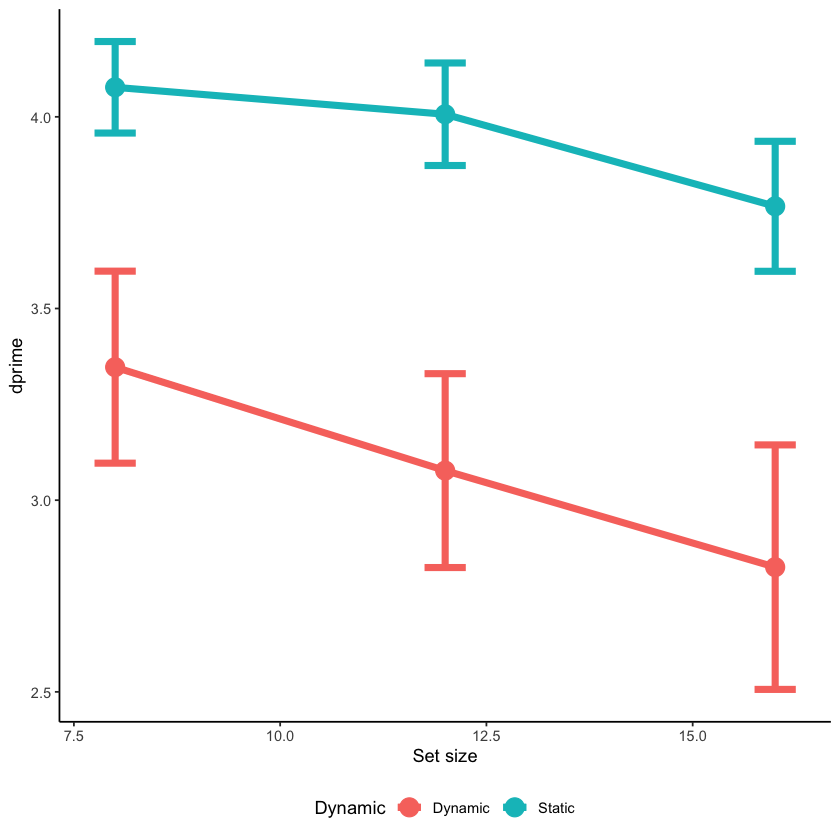

In [23]:
# visualize the dprime
ggplot(mSDT, aes(x = setsize, y = md, color = dyn, group = dyn)) + 
    geom_point(size = 5) + geom_line(size = 2) +  
    geom_errorbar(aes(ymin = md-dse, ymax = md+dse), width = 0.5, size = 2) + 
    theme_classic() + theme(legend.position = 'bottom') + 
    labs(x = 'Set size', y = 'dprime', color = 'Dynamic')


Now let's examine the decision criteria C. 

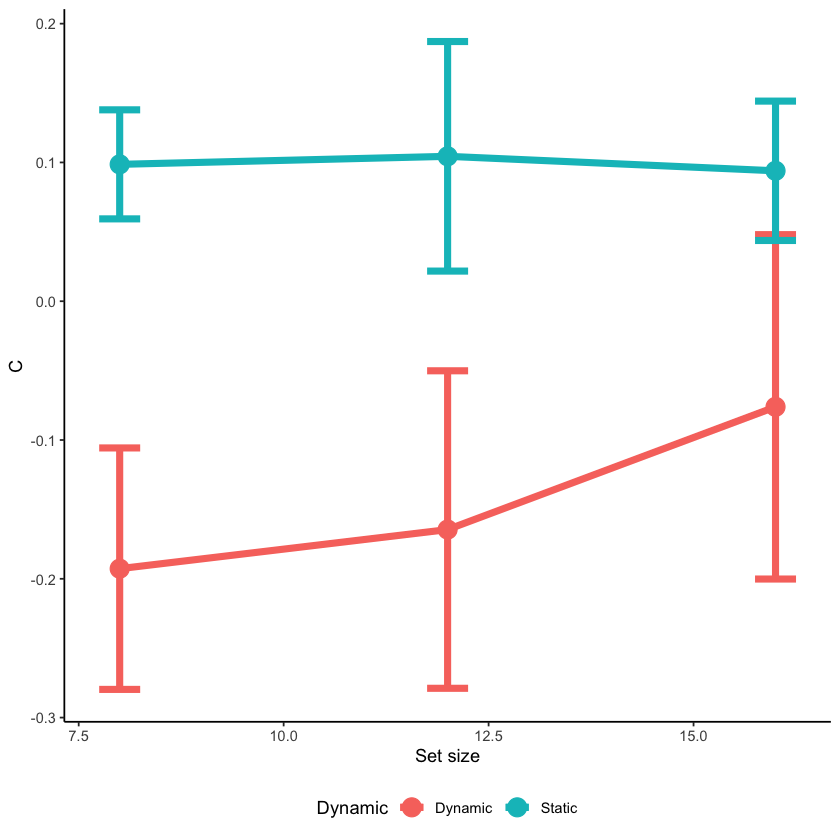

In [24]:
# visualize the C
ggplot(mSDT, aes(x = setsize, y = mc, color = dyn, group = dyn)) + 
    geom_point(size = 5) + geom_line(size = 2) +  
    geom_errorbar(aes(ymin = mc-Cse, ymax = mc+Cse), width = 0.5, size = 2) + 
    theme_classic() + theme(legend.position = 'bottom') + 
    labs(x = 'Set size', y = 'C', color = 'Dynamic')

From the figure presented, it is apparent that participants were more inclined towards liberal responses during dynamic searches compared to static ones. Specifically, they showed a higher tendency to indicate 'target present' rather than 'target absent'.

This pattern shifted with the introduction of reward manipulation in Experiment 2.

### Your practical task

Your task is to conduct a comparable analysis for Experiment 2. In this experiment, participants were rewarded for correct responses in trials where the target was either present or absent, with each condition tested in different sessions. This introduces a new variable in the data table, labeled `reward`. The terms `Absent` and `Present` within this column indicate the rewards given for correct responses in target-absent and target-present trials, respectively. 

The mean RTs and error rates for each condition are presented in the figure below.

![Experiment 2 RTs and error rates](https://github.com/strongway/tutorial_data_science/raw/master/figures/shi_2020_exp2_rts.png)

To assist with your analysis, the data has already been loaded with the code provided.

In [25]:
#load data
exp2 = read.csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp2.csv', sep = ',') 
exp2 = exp2 %>% filter(resp != -1) %>% # remove missing values %>%
        mutate(resp = 2-resp) # 1 - present, 2 - absent -> 1 and 0
head(exp2)

,target,setsize,dyn,resp,rt,sub,reward,correct
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>
1,Absent,12,Static,0,2.0583111,1,Absent,1
2,Present,8,Static,1,0.6495192,1,Absent,1
3,Present,16,Static,1,0.5995575,1,Absent,1
4,Present,12,Static,1,0.4896663,1,Absent,1
5,Absent,12,Static,0,1.8984851,1,Absent,1
6,Absent,8,Static,0,0.8893312,1,Absent,1


__Your task:__ calculate mean d' and C for each participant and each display type, separate for the two reward conditions.

In [26]:
# Your code here




`summarise()` has grouped output by 'sub', 'target', 'dyn', 'setsize'. You can
override using the `.groups` argument.


sub,dyn,setsize,reward,Absent,Present,dprime,C
<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dynamic,8,Absent,0.02941176,0.9857143,4.078860,-0.1499199
1,Dynamic,8,Present,0.05714286,0.9714286,3.481436,-0.1614985
1,Dynamic,12,Absent,0.05714286,0.9714286,3.481436,-0.1614985
1,Dynamic,12,Present,0.01428571,0.9142857,3.556978,0.4108609
1,Dynamic,16,Absent,0.01428571,0.7941176,3.010142,0.6842788
1,Dynamic,16,Present,0.01562500,0.8529412,3.203006,0.5523716


`summarise()` has grouped output by 'dyn', 'setsize'. You can override using
the `.groups` argument.


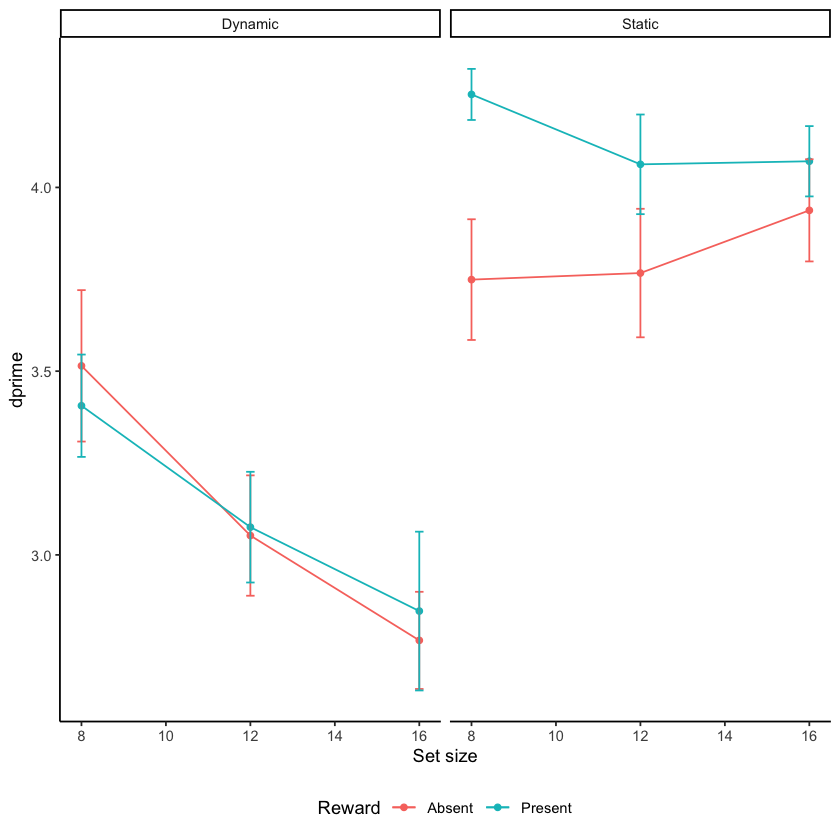

In [49]:
# Your visualization of the d-prime here


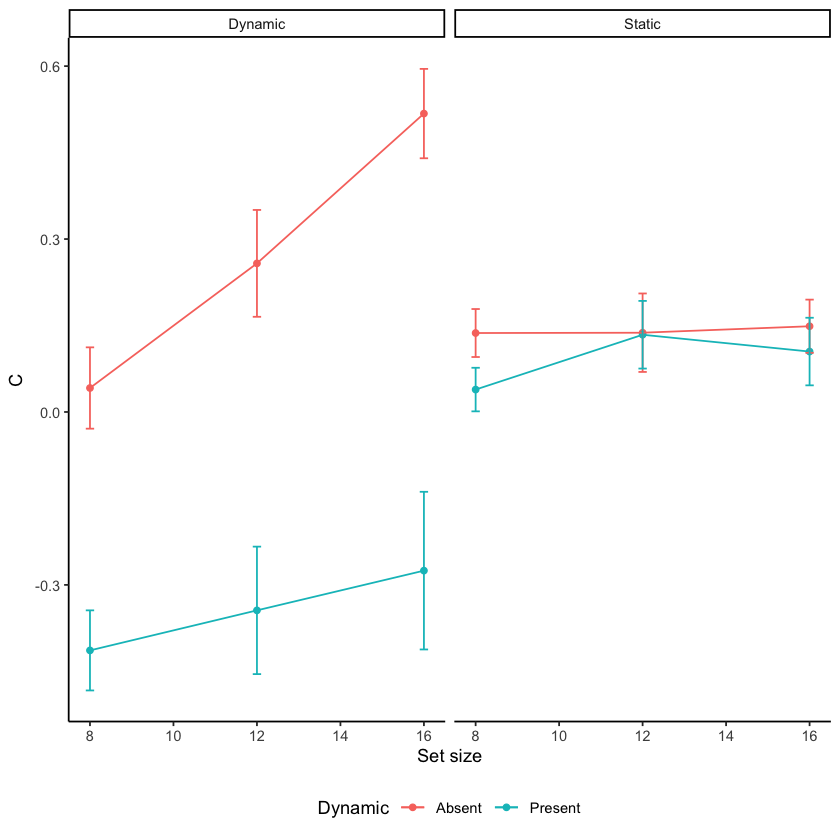

In [48]:
# Your visualize of the criterion C here
